In [1]:
import numpy as np

from einsteinpy.geodesic import Geodesic, Timelike, Nulllike
from einsteinpy.plotting import GeodesicPlotter, StaticGeodesicPlotter, InteractiveGeodesicPlotter

import sympy
from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

from sympy import simplify
from einsteinpy.symbolic import RicciScalar
from einsteinpy.symbolic.predefined import Schwarzschild, DeSitter, AntiDeSitter, Minkowski, find

from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor

from sympy import cos, diag, diff, limit, Matrix, pprint, simplify, sin

sympy.init_printing()

In [48]:
#%pylab inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib import cm

<a id='torus'></a>
### Torus

Torus: $S^1\times S^1=\{(0,\tau),0\leq\theta, \tau<2π\}$

A torus is the product of 2 circles. 

Identifying the top and bottom of the cylinder, we arrive at a torus which can be parametrized as
\begin{align}
 x &= (a+b\cos(\theta))\cos(\phi)\\
 y &= (a+b\cos(\theta))\sin(\phi)\\
 z &= b\sin(\theta)
\end{align}
where $a$ and $b$ are the two radii and the angles $\theta$ and $\phi$ run from $0$ to $2\pi$. 

In [3]:
syms = symbols('theta phi a b')
theta, phi, a, b = syms

Flat torus

In [6]:
r_torus = Matrix([a*cos(phi),
                 a*sin(phi),
                 b*cos(theta),
                 b*sin(theta)])
dr_torus = Matrix([diff(r_torus, theta).T, diff(r_torus, phi).T])

In [7]:
simplify(dr_torus*dr_torus.T)

⎡ 2    ⎤
⎢b   0 ⎥
⎢      ⎥
⎢     2⎥
⎣0   a ⎦

# Curved torus

In [19]:
r_torus = Matrix([(a + b*sin(theta))*cos(phi),
                 (a + b*sin(theta))*sin(phi),
                 b*cos(theta)])
dr_torus = Matrix([diff(r_torus, theta).T, diff(r_torus, phi).T])

In [20]:
simplify(dr_torus*dr_torus.T)

⎡ 2                 ⎤
⎢b          0       ⎥
⎢                   ⎥
⎢                  2⎥
⎣0   (a + b⋅sin(θ)) ⎦

In [21]:
g = MetricTensor(simplify(dr_torus*dr_torus.T), [theta, phi])

In [22]:
einst = EinsteinTensor.from_metric(g)
einst.tensor()

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [23]:
RicciScalar.from_metric(g)

RicciScalar2*sin(theta)/(b*(a + b*sin(theta)))

In [24]:
ch = ChristoffelSymbols.from_metric(g)
ch.tensor()

⎡                              ⎡                                   b⋅(a + b⋅si
⎢                              ⎢              0                 ──────────────
⎢⎡0             0           ⎤  ⎢                                 2            
⎢⎢                          ⎥  ⎢                                a  + 2⋅a⋅b⋅sin
⎢⎢   -(a + b⋅sin(θ))⋅cos(θ) ⎥  ⎢                                              
⎢⎢0  ───────────────────────⎥  ⎢   b⋅(a + b⋅sin(θ))⋅cos(θ)                    
⎢⎣              b           ⎦  ⎢──────────────────────────────                
⎢                              ⎢ 2                   2    2                   
⎣                              ⎣a  + 2⋅a⋅b⋅sin(θ) + b ⋅sin (θ)                

n(θ))⋅cos(θ)    ⎤⎤
────────────────⎥⎥
       2    2   ⎥⎥
(θ) + b ⋅sin (θ)⎥⎥
                ⎥⎥
                ⎥⎥
0               ⎥⎥
                ⎥⎥
                ⎦⎦

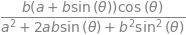

In [25]:
ch.tensor()[1,1,0]

Calculating the Riemann Curvature tensor

In [26]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                              ⎡                         (a + b⋅sin(θ))⋅sin(θ)
⎢                              ⎢           0             ─────────────────────
⎢           ⎡0  0⎤             ⎢                                   b          
⎢           ⎢    ⎥             ⎢                                              
⎢           ⎣0  0⎦             ⎢-(a + b⋅sin(θ))⋅sin(θ)                        
⎢                              ⎢───────────────────────            0          
⎢                              ⎣           b                                  
⎢                                                                             
⎢⎡               -b⋅sin(θ)  ⎤                                                 
⎢⎢     0        ────────────⎥                                                 
⎢⎢              a + b⋅sin(θ)⎥                       ⎡0  0⎤                    
⎢⎢                          ⎥                       ⎢    ⎥                    
⎢⎢  b⋅sin(θ)                ⎥                       

In [27]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(g)
rm2.tensor()

⎡                              ⎡                         (a + b⋅sin(θ))⋅sin(θ)
⎢                              ⎢           0             ─────────────────────
⎢           ⎡0  0⎤             ⎢                                   b          
⎢           ⎢    ⎥             ⎢                                              
⎢           ⎣0  0⎦             ⎢-(a + b⋅sin(θ))⋅sin(θ)                        
⎢                              ⎢───────────────────────            0          
⎢                              ⎣           b                                  
⎢                                                                             
⎢⎡               -b⋅sin(θ)  ⎤                                                 
⎢⎢     0        ────────────⎥                                                 
⎢⎢              a + b⋅sin(θ)⎥                       ⎡0  0⎤                    
⎢⎢                          ⎥                       ⎢    ⎥                    
⎢⎢  b⋅sin(θ)                ⎥                       

In [28]:
scalar_curvature_torus = RicciScalar.from_metric(g)

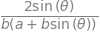

In [29]:
scalar_curvature_torus.expr

In [30]:
def curv2D(a,b,t):
    return 2*np.cos(t)/b/(a+b*np.cos(t))

#a_range = np.linspace(0,1,100)
#b_range = np.linspace(0,1,100)
#curv = np.zeros((size(a_range),size(b_range)), dtype=float)

a = 2
b = 0.5
curv = []

t_range = np.linspace(-np.pi,np.pi,100)

for t in t_range:
    curv.append(curv2D(a,b,t))

Text(0, 0.5, 'curvature')

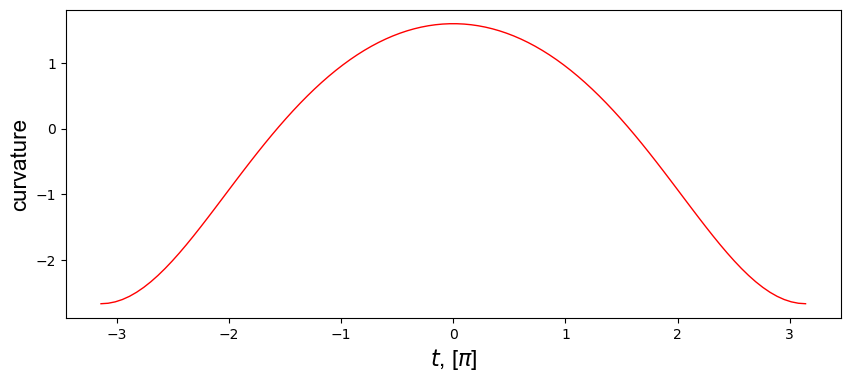

In [31]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1,1,figsize=(10, 4))

p = axes.plot(t_range, curv, 'r', linewidth=1.0)

axes.set_xlabel(r'$t$, [$\pi$]', fontsize=16, **hfont)
axes.set_ylabel(r'curvature', fontsize=16, **hfont)

# Hypertorus 4D

$w = (с + (b + a\cos(t_1))\cos(t_2))\cos(t_3) $

$x = (c + (b + a\cos(t_1))\cos(t_2))\sin(t_3) $

$y = (b + a\cos(t_1))\sin(t_2)$

$z = a\sin t_1$

$T^3=S^1\times S^1\times S^1$

In [32]:
syms = symbols('t1 t2 t3 a b c')
t1, t2, t3,  a, b, c = syms

In [33]:
r_torus = Matrix([(c + (b + a*cos(t1))*cos(t2))*cos(t3),
                 (c + (b + a*cos(t1))*cos(t2))*sin(t3),
                 (b + a*cos(t1))*sin(t2),
                 a*sin(t1)])
dr_torus = Matrix([diff(r_torus, t1).T, diff(r_torus, t2).T, diff(r_torus, t3).T])

In [34]:
simplify(dr_torus*dr_torus.T)

⎡ 2                                                  ⎤
⎢a          0                        0               ⎥
⎢                                                    ⎥
⎢                   2                                ⎥
⎢0   (a⋅cos(t₁) + b)                 0               ⎥
⎢                                                    ⎥
⎢                                                   2⎥
⎣0          0          (c + (a⋅cos(t₁) + b)⋅cos(t₂)) ⎦

In [35]:
g = MetricTensor(simplify(dr_torus*dr_torus.T), [t1, t2, t3])

In [36]:
einst = EinsteinTensor.from_metric(g)
einst.tensor()

⎡ a⋅(2⋅a⋅cos(t₁)⋅cos(t₂) + 2⋅b⋅cos(t₂) + c)⋅cos(t₁)     a⋅(3⋅a⋅cos(t₁)⋅cos(t₂)
⎢─────────────────────────────────────────────────── - ───────────────────────
⎢(a⋅cos(t₁) + b)⋅(a⋅cos(t₁)⋅cos(t₂) + b⋅cos(t₂) + c)   (a⋅cos(t₁) + b)⋅(a⋅cos(
⎢                                                                             
⎢                                                                             
⎢                                                    0                        
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                    0                        
⎣                                                                             

 + 2⋅b⋅cos(t₂) + c)⋅cos(t₁)                        

In [37]:
RicciScalar.from_metric(g)

RicciScalar2*(3*a*cos(t1)*cos(t2) + 2*b*cos(t2) + c)*cos(t1)/(a*(a*cos(t1) + b)*(a*cos(t1)*cos(t2) + b*cos(t2) + c))

In [38]:
ch = ChristoffelSymbols.from_metric(g)
ch.tensor()

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢⎡0             0                                   0                      ⎤  
⎢⎢                                                                         ⎥  
⎢⎢   (a⋅cos(t₁) + b)⋅sin(t₁)                                               ⎥  
⎢⎢0  ───────────────────────                        0                      ⎥  
⎢⎢              a                                                          ⎥  
⎢⎢                                                                         ⎥  
⎢⎢                            (c + (a⋅cos(t₁) + b)⋅cos(t₂))⋅sin(t₁)⋅cos(t₂)⎥  
⎢⎢0             0             ─────────────────────────────────────────────⎥  
⎢⎣                                                  a                      ⎦  
⎢                                                   

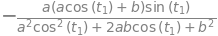

In [39]:
ch.tensor()[1,1,0]

Calculating the Riemann Curvature tensor

In [40]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                             
⎢                                                                             
⎢                                ⎡0  0  0⎤                                    
⎢                                ⎢       ⎥                                    
⎢                                ⎢0  0  0⎥                                    
⎢                                ⎢       ⎥                                    
⎢                                ⎣0  0  0⎦                                    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                    ⎡                -a⋅cos(t₁)     ⎤                        
⎢                    ⎢      0        ─────────────  

In [41]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(g)
rm2.tensor()

⎡                                                                             
⎢                                                                             
⎢                                ⎡0  0  0⎤                                    
⎢                                ⎢       ⎥                                    
⎢                                ⎢0  0  0⎥                                    
⎢                                ⎢       ⎥                                    
⎢                                ⎣0  0  0⎦                                    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                    ⎡                -a⋅cos(t₁)     ⎤                        
⎢                    ⎢      0        ─────────────  

In [42]:
scalar_curvature_torus = RicciScalar.from_metric(g)

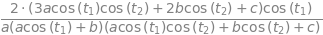

In [43]:
scalar_curvature_torus.expr

In [65]:
def curv3D(a,b,c, t1,t2):
    return 2*(3*a*np.cos(t1)*np.cos(t2)+2*b*np.cos(t2)+c)*np.cos(t1)/a/(a*np.cos(t1)+b)/(a*np.cos(t1)*np.cos(t2)+b*np.cos(t2)+c)

a = 1
b = 2
c = 4

t1_range = np.linspace(-np.pi,np.pi,100)
t2_range = np.linspace(-np.pi,np.pi,100)
curv = np.zeros((np.size(t1_range),np.size(t2_range)), dtype=float)

for t1_id, t1_value in enumerate(t1_range):
    for t2_id, t2_value in enumerate(t2_range):
        curv[t1_id][t2_id] = curv3D(a,b,c,t1_value,t2_value)

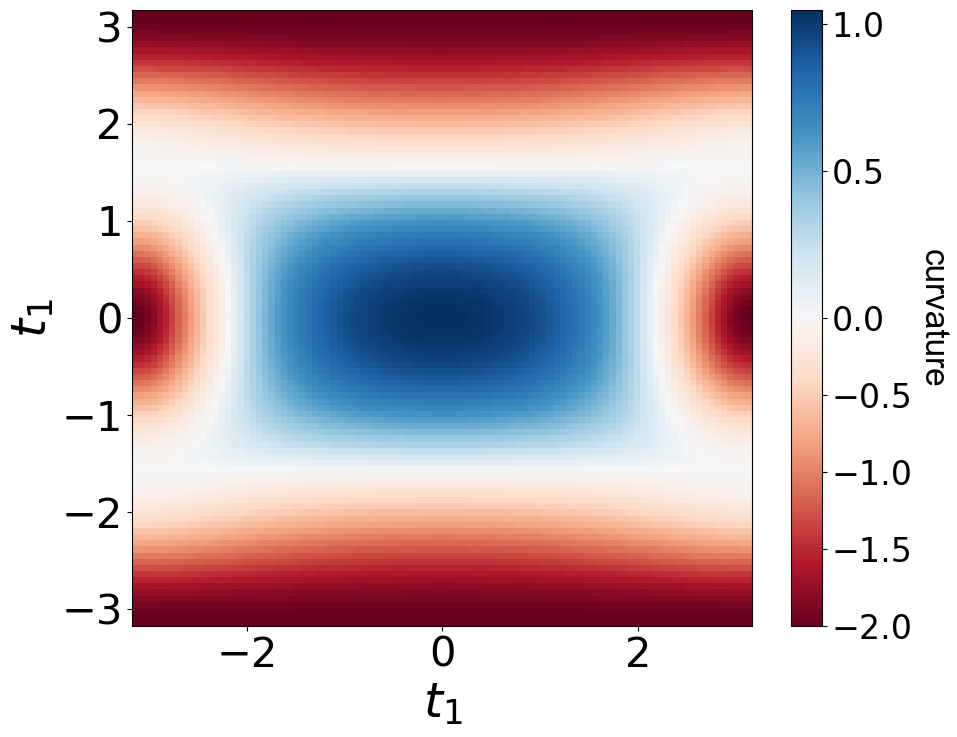

In [67]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1,1,figsize=(10, 8))


norm = TwoSlopeNorm(vmin=curv.min(), vcenter=0, vmax=curv.max())
p = axes.pcolor(t1_range, t2_range, curv,norm=norm, cmap = cm.RdBu, shading='nearest')  #RdBu
#p = axes.pcolor(t1_range, t2_range, curv,cmap = cm.RdBu, shading='nearest')  #terrain

axes.axis('tight')
axes.set_xlabel(r'$t_1$', fontsize=35, **hfont)
axes.set_ylabel(r'$t_1$', fontsize=35, **hfont)

axes.tick_params(axis='x', labelsize=30)
axes.tick_params(axis='y', labelsize=30)

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'curvature', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=24) 
    
#ymin, ymax = axes.get_ylim()
#axes.set_yticks(np.round(np.linspace(ymin, ymax, 5), 2))

#xmin, xmax = axes.get_xlim()
#axes.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))

# Hypertorus 5D

$v = (d + (с + (b + a\cos(t_1))\cos(t_2))\cos(t_3))\cos(t_4) $

$w = (d + (с + (b + a\cos(t_1))\cos(t_2))\cos(t_3))\sin(t_4) $

$x = (c + (b + a\cos(t_1))\cos(t_2))\sin(t_3) $

$y = (b + a\cos(t_1))\sin(t_2)$

$z = a\sin t_1$

$T^3=S^1\times S^1\times S^1\times S^1$

In [50]:
syms = symbols('t1 t2 t3 t4 a b c d')
t1, t2, t3, t4,  a, b, c, d = syms

In [52]:
r_torus = Matrix([(d + (c + (b + a*cos(t1))*cos(t2))*cos(t3))*cos(t4),
                  (d + (c + (b + a*cos(t1))*cos(t2))*cos(t3))*sin(t4),
                 (c + (b + a*cos(t1))*cos(t2))*sin(t3),
                 (b + a*cos(t1))*sin(t2),
                 a*sin(t1)])
dr_torus = Matrix([diff(r_torus, t1).T, diff(r_torus, t2).T, diff(r_torus, t3).T, diff(r_torus, t4).T])

In [53]:
simplify(dr_torus*dr_torus.T)

⎡ 2                                                                           
⎢a          0                        0                                      0 
⎢                                                                             
⎢                   2                                                         
⎢0   (a⋅cos(t₁) + b)                 0                                      0 
⎢                                                                             
⎢                                                   2                         
⎢0          0          (c + (a⋅cos(t₁) + b)⋅cos(t₂))                        0 
⎢                                                                             
⎢                                                                             
⎣0          0                        0                 (d + (c + (a⋅cos(t₁) + 

                     ⎤
                     ⎥
                     ⎥
                     ⎥
                     ⎥
               

In [54]:
g = MetricTensor(simplify(dr_torus*dr_torus.T), [t1, t2, t3, t4])

In [55]:
einst = EinsteinTensor.from_metric(g)
einst.tensor()

⎡                                                                   ⎛   2    2
⎢                                                                 a⋅⎝6⋅a ⋅cos 
⎢- ───────────────────────────────────────────────────────────────────────────
⎢   3    3        2                  2      2        2                  2     
⎢  a ⋅cos (t₁)⋅cos (t₂)⋅cos(t₃) + 3⋅a ⋅b⋅cos (t₁)⋅cos (t₂)⋅cos(t₃) + 2⋅a ⋅c⋅co
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [56]:
RicciScalar.from_metric(g)

RicciScalar2*(6*a**2*cos(t1)**2*cos(t2)**2*cos(t3) + 9*a*b*cos(t1)*cos(t2)**2*cos(t3) + 6*a*c*cos(t1)*cos(t2)*cos(t3) + 3*a*d*cos(t1)*cos(t2) + 3*b**2*cos(t2)**2*cos(t3) + 4*b*c*cos(t2)*cos(t3) + 2*b*d*cos(t2) + c**2*cos(t3) + c*d)*cos(t1)/(a*(a**3*cos(t1)**3*cos(t2)**2*cos(t3) + 3*a**2*b*cos(t1)**2*cos(t2)**2*cos(t3) + 2*a**2*c*cos(t1)**2*cos(t2)*cos(t3) + a**2*d*cos(t1)**2*cos(t2) + 3*a*b**2*cos(t1)*cos(t2)**2*cos(t3) + 4*a*b*c*cos(t1)*cos(t2)*cos(t3) + 2*a*b*d*cos(t1)*cos(t2) + a*c**2*cos(t1)*cos(t3) + a*c*d*cos(t1) + b**3*cos(t2)**2*cos(t3) + 2*b**2*c*cos(t2)*cos(t3) + b**2*d*cos(t2) + b*c**2*cos(t3) + b*c*d))

In [57]:
ch = ChristoffelSymbols.from_metric(g)
ch.tensor()

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢⎡0             0                                   0                         
⎢⎢                                                                            
⎢⎢   (a⋅cos(t₁) + b)⋅sin(t₁)                                                  
⎢⎢0  ───────────────────────                        0                         
⎢⎢              a                                                             
⎢⎢                                                                            
⎢⎢                            (c + (a⋅cos(t₁) + b)⋅cos(t₂))⋅sin(t₁)⋅cos(t₂)   
⎢⎢0             0             ─────────────────────────────────────────────   
⎢⎢                                                  a                         
⎢⎢                                                  

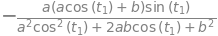

In [58]:
ch.tensor()[1,1,0]

Calculating the Riemann Curvature tensor

In [59]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                             
⎢                                                                             
⎢                                                            ⎡0  0  0  0⎤     
⎢                                                            ⎢          ⎥     
⎢                                                            ⎢0  0  0  0⎥     
⎢                                                            ⎢          ⎥     
⎢                                                            ⎢0  0  0  0⎥     
⎢                                                            ⎢          ⎥     
⎢                                                            ⎣0  0  0  0⎦     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [60]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(g)
rm2.tensor()

⎡                                                                             
⎢                                                                             
⎢                                                            ⎡0  0  0  0⎤     
⎢                                                            ⎢          ⎥     
⎢                                                            ⎢0  0  0  0⎥     
⎢                                                            ⎢          ⎥     
⎢                                                            ⎢0  0  0  0⎥     
⎢                                                            ⎢          ⎥     
⎢                                                            ⎣0  0  0  0⎦     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [61]:
scalar_curvature_torus = RicciScalar.from_metric(g)

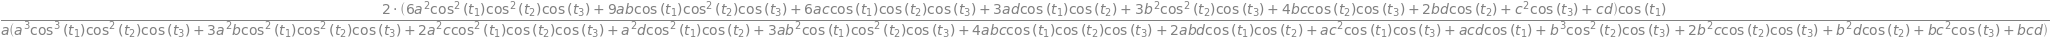

In [62]:
scalar_curvature_torus.expr

In [68]:
def curv4D(a,b,c,d,t1,t2,t3):
    numerator = 2 * (
        6 * a**2 * np.cos(t1)**2 * np.cos(t2)**2 * np.cos(t3) +
        9 * a * b * np.cos(t1) * np.cos(t2)**2 * np.cos(t3) +
        6 * a * c * np.cos(t1) * np.cos(t2) * np.cos(t3) +
        3 * a * d * np.cos(t1) * np.cos(t2) +
        3 * b**2 * np.cos(t2)**2 * np.cos(t3) +
        4 * b * c * np.cos(t2) * np.cos(t3) +
        2 * b * d * np.cos(t2) +
        c**2 * np.cos(t3) +
        c * d
    ) * np.cos(t1)
    
    denominator = a * (
        a**3 * np.cos(t1)**3 * np.cos(t2)**2 * np.cos(t3) +
        3 * a**2 * b * np.cos(t1)**2 * np.cos(t2)**2 * np.cos(t3) +
        2 * a**2 * c * np.cos(t1)**2 * np.cos(t2) * np.cos(t3) +
        a**2 * d * np.cos(t1)**2 * np.cos(t2) +
        3 * a * b**2 * np.cos(t1) * np.cos(t2)**2 * np.cos(t3) +
        4 * a * b * c * np.cos(t1) * np.cos(t2) * np.cos(t3) +
        2 * a * b * d * np.cos(t1) * np.cos(t2) +
        a * c**2 * np.cos(t1) * np.cos(t3) +
        a * c * d * np.cos(t1) +
        b**3 * np.cos(t2)**2 * np.cos(t3) +
        2 * b**2 * c * np.cos(t2) * np.cos(t3) +
        b**2 * d * np.cos(t2) +
        b * c**2 * np.cos(t3) +
        b * c * d)
    return numerator/denominator

In [69]:
a = 1
b = 2
c = 4
d = 8

t1_range = np.linspace(-np.pi,np.pi,100)
t2_range = np.linspace(-np.pi,np.pi,100)
t3_range = np.linspace(-np.pi,np.pi,100)
curv = np.zeros((np.size(t1_range),np.size(t2_range),np.size(t3_range)), dtype=float)

for t1_id, t1_value in enumerate(t1_range):
    for t2_id, t2_value in enumerate(t2_range):
        for t3_id, t3_value in enumerate(t3_range):
            curv[t1_id][t2_id][t3_id] = curv4D(a,b,c,d,t1_value,t2_value,t3_value)

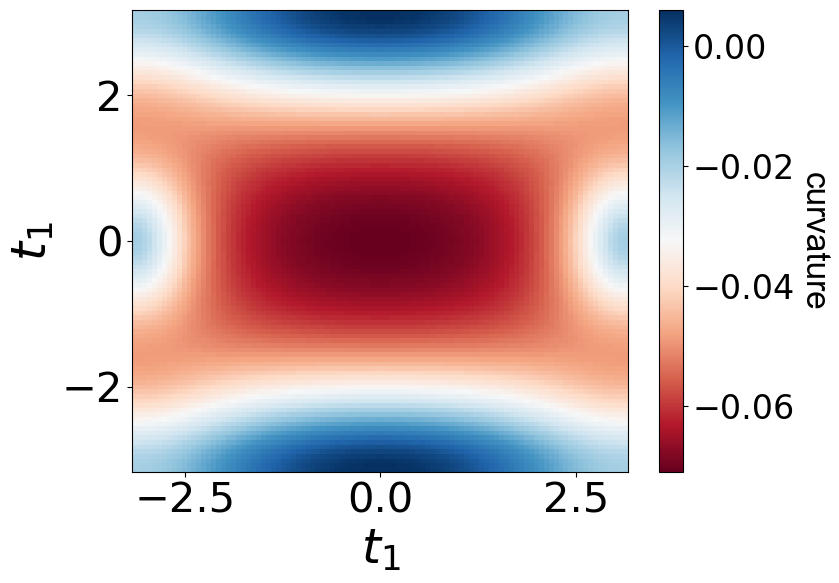

In [80]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1,1,figsize=(8, 6))


norm = TwoSlopeNorm(vmin=curv.min(), vcenter=0, vmax=curv.max())
#p = axes.pcolor(t1_range, t2_range, curv,norm=norm, cmap = cm.RdBu, shading='nearest')  #RdBu
p = axes.pcolor(t1_range, t2_range, curv[75],cmap = cm.RdBu, shading='nearest')  #terrain

axes.axis('tight')
axes.set_xlabel(r'$t_1$', fontsize=35, **hfont)
axes.set_ylabel(r'$t_1$', fontsize=35, **hfont)

axes.tick_params(axis='x', labelsize=30)
axes.tick_params(axis='y', labelsize=30)

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'curvature', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=24) 
    
#ymin, ymax = axes.get_ylim()
#axes.set_yticks(np.round(np.linspace(ymin, ymax, 5), 2))

#xmin, xmax = axes.get_xlim()
#axes.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))